**Gold Price Prediction using Machine Learning**

**1. Data Collection & Pre-processing**  
- Loading the dataset and checking its structure, including missing values and statistical properties.  
- Exploring correlations between features using a **heatmap**.  

**2. Feature Selection & Data Splitting**  
- Dropping irrelevant columns and separating **features (X)** and **target variable (y)**.  
- Splitting the dataset into **training and testing sets** for model development.  

**3. Model Training**  
- Training a **Random Forest Regressor**, which is an ensemble learning model that combines multiple decision trees for better predictive accuracy.  

**4. Model Evaluation**  
- Predicting gold prices on test data.  
- Comparing actual vs. predicted prices using **line plots** and **scatter plots** for visualization.  

**5. Visualization**  
- **Heatmap** to analyze correlations.  
- **Histogram** to check the distribution of gold prices.  
- **Scatter plot** for actual vs. predicted values.  


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Data Collection and Pre-processing**

In [61]:
gold_df=pd.read_csv(r"C:\Users\Dell\Downloads\gld_price_data.csv")

In [62]:
gold_df.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [63]:
gold_df.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [64]:
gold_df.shape

(2290, 6)

In [65]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [66]:
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [67]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation**<br>
**1.Positive Correlation**<br>
**2.Negative Correlation**

In [68]:
# Finding correlation between columns, also we've to remove non-numeric columns manually, like I've done below or else we'll face an error.

correlation=gold_df.drop(columns=['Date']).corr()

<Axes: >

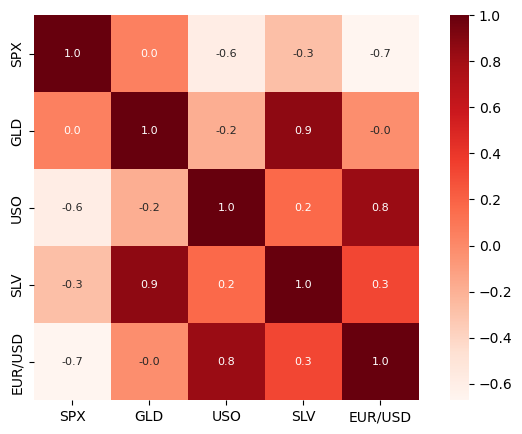

In [69]:
# Heatmap to understand the correlation

plt.figure(figsize=(8,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap="Reds")

In [70]:
# Correlation values for GLD

correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

**From the above Correlation Matrix, we can see that Gold['GLD'] is positively correlated to 'SLV'**

<Axes: xlabel='GLD', ylabel='Count'>

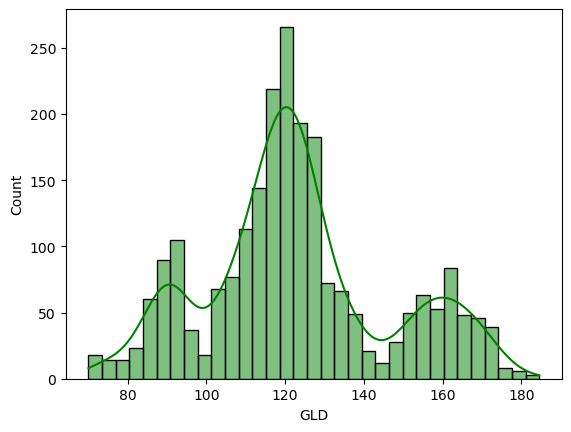

In [71]:
# checking the distribution of the GLD Price

sns.histplot(gold_df['GLD'], color='green', kde=True)

**Splitting the Features and Target**

In [72]:
X=gold_df.drop(['Date','GLD'],axis=1)
y=gold_df['GLD']

In [73]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [74]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

**Splitting the dataset into training and testing**

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

**Model Training - Random Forest Regressor**

In [76]:
regressor=RandomForestRegressor(n_estimators=100)

In [77]:
# Training

regressor.fit(X_train,y_train)

RandomForestRegressor()

**Evaluation**

In [78]:
# Evaluation

# Prediction on Test data

test_data_prediction=regressor.predict(X_test)

In [79]:
test_data_prediction

array([113.61759996, 148.04470113, 140.26419926, 112.64510174,
       113.72749948,  95.62099963, 111.97299998,  93.29719942,
       120.65720086, 127.11039956, 147.50489862, 120.56389892,
       119.15290082,  88.20100063,  96.16330022,  92.77079881,
       116.62480073,  89.08139923, 125.45470098, 114.7894002 ,
       119.33849939, 152.72510267, 122.61709792, 119.89789978,
       171.39219942, 108.16609842, 120.34530036,  87.16529862,
        87.9150006 ,  88.60349937, 121.35830047, 154.33880133,
       150.17079815, 125.87879949, 126.58770014,  90.952599  ,
       159.64479928, 121.63130173, 106.68480042, 144.32779686,
        92.61179982, 127.54020091, 117.41800087, 152.56450124,
       119.3366997 ,  91.08070116,  80.33369977, 120.274302  ,
       131.92340071, 119.08109966, 127.32040065, 165.9258009 ,
       153.45629964,  92.67399938, 148.9988009 , 151.56469914,
       113.10930113, 112.92590026,  87.03469915, 127.77649865,
       125.14530058, 151.72550283, 114.28939985, 110.48

In [80]:
# R squared error

error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9873322491739364


**Compare the Actual Values and Predicted Values in a Plot**

In [81]:
y_test = list(y_test)

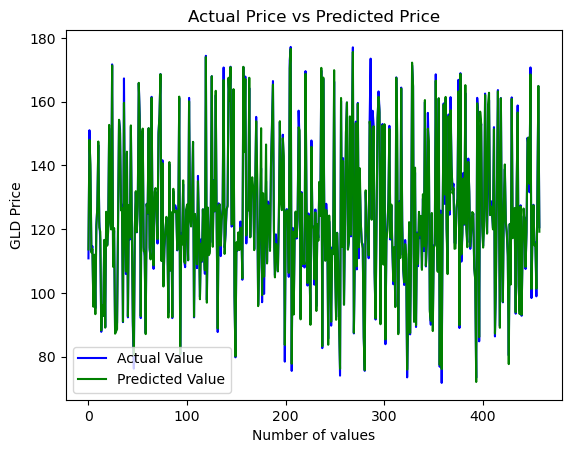

In [82]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

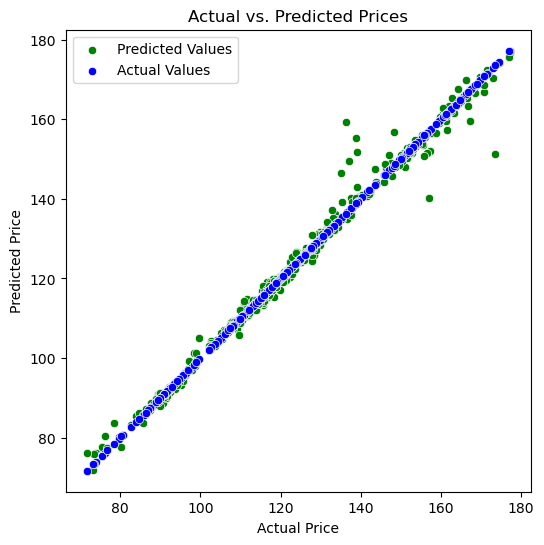

In [83]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=test_data_prediction, color='green', label='Predicted Values')
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual Values')  # Ideally forms a diagonal line

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.legend()
plt.show()
